In [24]:
import os,sys
import pathlib
sys.path.append(os.path.abspath('./practico6'))

In [25]:
import funciones6 as f6

In [26]:
import pandas as pd
import matplotlib.pyplot as plt
from scipy import stats
import numpy as np
import seaborn as sns
from astropy.cosmology import FlatLambdaCDM
from scipy.optimize import curve_fit

# Relacion de Tully - Fisher

- Esta relacion es pertinente a las galaxias tipo S.

- Correlaciona los maximos de la velocidad de rotacion de una galaxia espiral (siempre y cuando sea posible obtener estas velocidades, las cuales deben ser radiales) con la luminosidad o magnitud absoluta de la misma.

- Se constituye un indicador de distancia puesto que teniendo la relacion $f(v)$ se puede obtener una magnitud absoluta y si se conoce la magnitud aparente puede conocerse la distancia $d_{l}$

- La relacion existente entre estos parametros es practicamente lineal. De manera que se debe realizar un ajuste lineal para conocerla.

- En el catalogo de Giovanelli disponemos de:
    - W : El ancho de la linea del perfil de velocidad Heliocentrica de una galaxia S en [km/s]. Esta magnitud se ofrece como $log(W)$
    - M : Magnitud absoluta
    - Tipos morfologicos de las galaxias tipo S: *...morphological type code in the RC3 scheme, where code 1 corresponds to Sa’s, code 3 to Sb’s, code 5 to Sc’s and so on. When the type code is followed by a “B”, the galaxy disk has anidentifiable bar.* Giovanelli et al,. 1997

<img src="figures/tf1.png" alt="tf1">

Imagen de *Extragalactic astronomy - Peter Schneider* Muestra perfil de velocidad Heliocentrica de una galaxia S. W es el ancho entre los picos de velocidad de rotacion.

- La relacion de Tully-Fisher Nos indica que: $M = m\times log(W) + b$

In [27]:
df = pd.read_csv("practico6/giovanelli.dat", delim_whitespace=True)
df2 = df[df["Mcor"]<0]

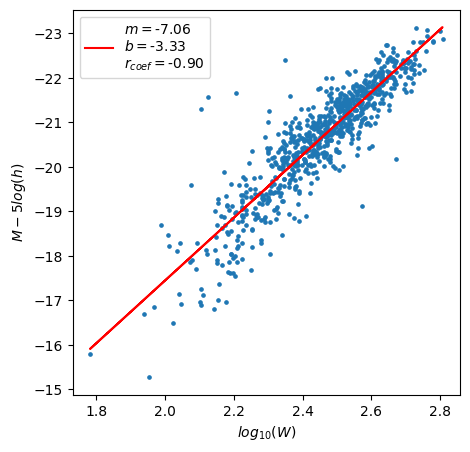

In [28]:
f6.funcion1(df2)

Los resultados obtenidos en el paper de Giovanelli son: $(-21.00 \pm 0.02) + (-7.68 \pm 0.13) log_{10}(W - 2.5)$

# Morfologia

No hay una gran dependencia con la morfologia en la banda I que es donde tenemos los datos.

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


array([[<Axes: xlabel='$log(W)$', ylabel='$M-5log(h)$'>,
        <Axes: xlabel='$log(W)$', ylabel='$M-5log(h)$'>],
       [<Axes: xlabel='$log(W)$', ylabel='$M-5log(h)$'>,
        <Axes: xlabel='$log(W)$', ylabel='$M-5log(h)$'>]], dtype=object)

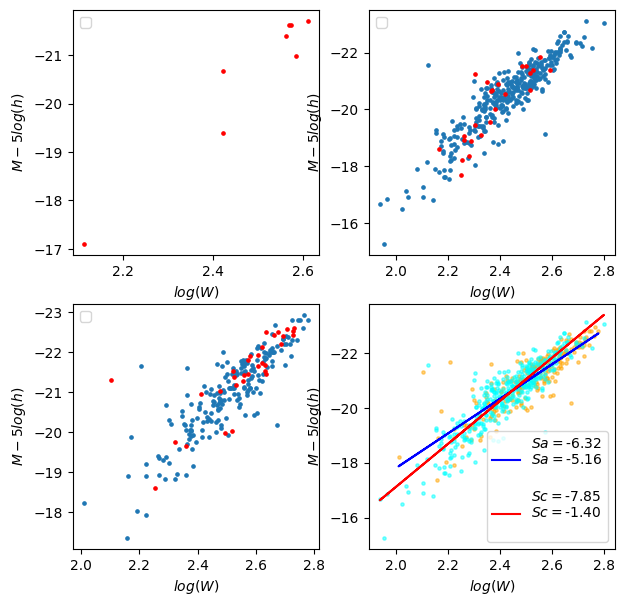

In [29]:
f6.funcion2(df2)

# Uso de la velocidad como indicador de distancia:

- Considere una galaxia con $W=167 \frac{km}{s}$
- Considere que la misma galaxia tiene $m=14.51$
- Determine la magnitud absoluta y su distancia.

Tenga en cuenta la relacion distancia luminosidad:
$$5 log_{10}(\frac{d_{L}}{1[Mpc]}) = m - M -25$$

$$d_{L} = 10^{(\frac{m-M-25}{5})}$$

Como, mi relacion obtenida fue: $m=-7.06[s km_{-1}]$ y $b=-3.33$, entonces: 
$$M = -7.06 log_{10}(W)-3.33$$

Obtendria finalmente:
$$d_{L} = 10^{(\frac{m-[-7.06 log_{10}(W)-3.33]-25}{5})}$$

Verificacion del resultado <a href="https://ned.ipac.caltech.edu/byname?objname=UGC+00553&hconst=67.8&omegam=0.308&omegav=0.692&wmap=4&corr_z=1"> aca </a>


In [30]:
# Calculo:
def dl(m,w,s1,i1):
    dl = 10**((m - (s1*np.log10(w)+i1)-25)/5)
    return dl

def mabs(s1,i1,w):
    return s1*np.log10(w)+i1

In [31]:
mabs(-7.06,-3.33,167)
dl(14.51,167,-7.06,-3.33)

50.87163046712787

# Relaciones del Plano fundamental - Galaxias E

## Catalogos

- Catalogos EFAR: <a href="https://vizier.cds.unistra.fr/viz-bin/VizieR-2">Vizier</a>
- Catalogo 1: <a href="https://vizier.cds.unistra.fr/viz-bin/VizieR-3?-source=J/MNRAS/292/499/table4">Saglia</a>
- Catalogo 2: <a href="https://vizier.cds.unistra.fr/viz-bin/VizieR-3?-source=J/MNRAS/305/259/table5&-out.max=50&-out.form=HTML%20Table&-out.add=_r&-out.add=_RAJ,_DEJ&-sort=_r&-oc.form=sexa">Wegner</a>

- Informacion sobre el catalogo de Wegner: <a href="https://cdsarc.cds.unistra.fr/viz-bin/ReadMe/J/MNRAS/305/259?format=html&tex=true">Link</a>

## Parametros Catalogo Wegner
<table>
  <tr>
    <th>Label</th>
    <th>Unit</th>
    <th>Description</th>
  </tr>
  <tr>
    <td>GIN</td>
    <td>---</td>
    <td>Galaxy identification number</td>
  </tr>
  <tr>
    <td>Name</td>
    <td>---</td>
    <td>Galaxy name</td>
  </tr>
  <tr>
    <td>CAN</td>
    <td>---</td>
    <td>Cluster assignment number</td>
  </tr>
  <tr>
    <td>cz</td>
    <td>km/s</td>
    <td>Redshift (combined estimate)</td>
  </tr>
  <tr>
    <td>e</td>
    <td> km/s</td>
    <td>Velocity dispersion (total error)</td>
  </tr>
  <tr>
    <td>sigma</td>
    <td> km/s</td>
    <td>Velocity dispersion (combined estimate)</td>
  </tr>
    <tr>
    <td>e</td>
    <td> km/s</td>
    <td>Velocity dispersion (total error)</td>
  </tr>
  <tr>
    <td>dsigma</td>
    <td> km/s</td>
    <td>Velocity dispersion (weighted rms error)</td>
  </tr>
</table>

## Parametros del catalogo de Saglia

<table>
  <tr>
    <th>Label</th>
    <th>Unit</th>
    <th>Description</th>
  </tr>
  <tr>
    <td>GIN</td>
    <td>---</td>
    <td>Galaxy identification number</td>
  </tr>
  <tr>
    <td>Btot</td>
    <td>---</td>
    <td>Total luminosity in R</td>
  </tr>
  <tr>
    <td>< SBe ></td>
    <td>mag/arcsec+2</td>
    <td>Average effective surface brightness in Rmag/arcsec2</td>
  </tr>
  <tr>
    <td>Dn</td>
    <td>arcsec</td>
    <td>Diameter of the galaxy </td>
  </tr>
  <tr>
    <td>AR</td>
    <td>mag</td>
    <td>R-band Galactic absorption</td>
  </tr>
  <tr>
    <td>KR</td>
    <td>mag</td>
    <td>R-band K correction</td>
  </tr>
  <tr>
    <td>Re</td>
    <td> arcsec</td>
    <td>Half-luminosity radius</td>
  </tr>

</table>

# Practico

*Hare primero los puntos a,d*

<div style="color:red">(a)</div> 
Correlacionar los catalogos de Saglia y Wegner. Para correlacionarlos hay que utilizar el indice GIN que se encuentra en ambos catalogos

<div style="color:red">(d)</div> 
Convertir Btot a magnitud absoluta.

- Tener en cuenta que para hacer la distribucion de $R_{tot}$ tenemos primero que hacer la correccion K y tambien corregir por extincion.
- Para hacer la correccion hacemos como en este paper (ecuacion 11) (Shen, Shiyin, et al. "The size distribution of galaxies in the Sloan Digital Sky Survey." ) - Solo que utilizo 25 para tener la distancia en Megaparsecs.
$$ M = m - 5log_{10}(d_{L,Mpc}) -25 + KR + AR$$

- Para las cantidades en arcosegundo --> kpc: 
$$\alpha[kpc] = \frac{(dn/re)*\pi*d_{a}*1000}{180*3600}$$

- Los parametros a utilizar para la cosmologia son: $H_{0}=100 km s^{-1} Mpc^{-1}$

- Graficar magnitud absoluta vs redshift

In [32]:
saglia = pd.read_csv("./practico6/saglia2.dat", delim_whitespace=True, header=0)
wegner = pd.read_csv("./practico6/Wegner.dat", delim_whitespace=True, header=0)
# Ahora genero un nuevo catalogo, juntando los dos anteriores, con los valores de GIN que coincidan en ambos catalogos
df = pd.merge(saglia,wegner,on="GIN", how="left")

# Agrego estas columnas para facilitarme los plots con Seaborn
df["log_dn"] = np.log10(df['Dn'])
df["log_re"] = np.log10(df['Re'])
df = df[df['sigma']<500]

# Actualizo los datos como requiere el punto 2
r,dn,re = f6.dl_da_(df) # calculo las transformaciones
# Agrego nuevas columnas al dataframe

df['r'] =r
df['log_dn']=np.log10(dn)
df['log_re']=np.log10(re)
df['log_dn_re']=np.log10(dn)/np.log10(re)
df['log_dn_re_deg']=np.log10(dn/re)
df['log_sigma'] = np.log10(df['sigma'])
df['log_re_s2'] = np.log10(re*df['sigma']**2)

df = df[df['log_dn_re']<50]


<Axes: xlabel='z', ylabel='Mr'>

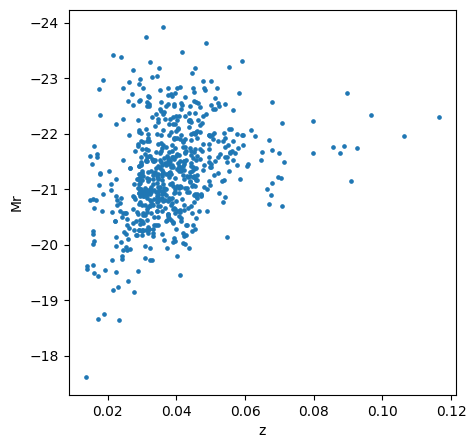

In [33]:
f6.funcion5(df)

<div style="color:red">(b)</div> 
Realizar las distribuciones de:

$log(D_{n})$, $log(R_{e})$, $R_{tot}$ y $< SB_{e}>$

array([<Axes: xlabel='log_dn', ylabel='Count'>,
       <Axes: xlabel='log_re', ylabel='Count'>,
       <Axes: xlabel='BTot', ylabel='Count'>,
       <Axes: xlabel='<SBe>', ylabel='Count'>], dtype=object)

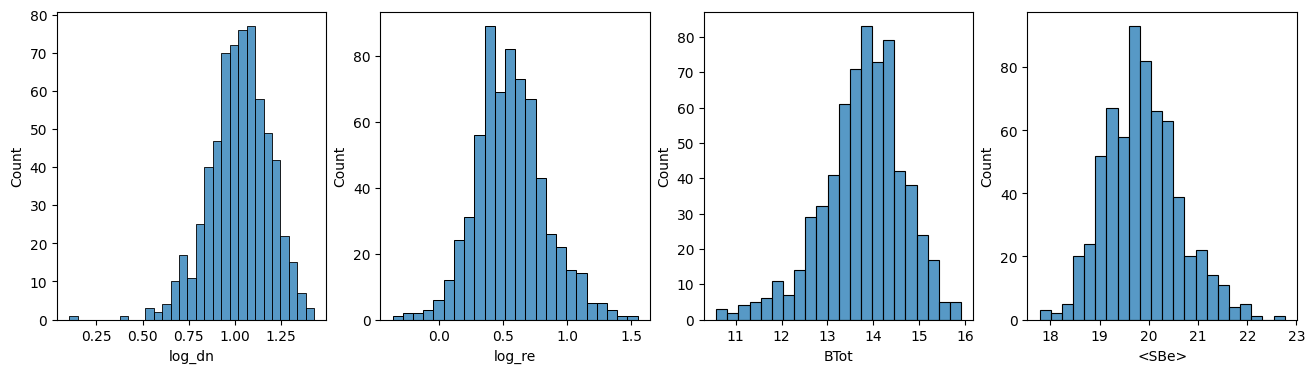

In [34]:
f6.funcion3(df)

<div style="color:red">(c)</div>

Realizar las distribuciones de $\sigma$ y velocidad



<Axes: xlabel='sigma', ylabel='cz'>

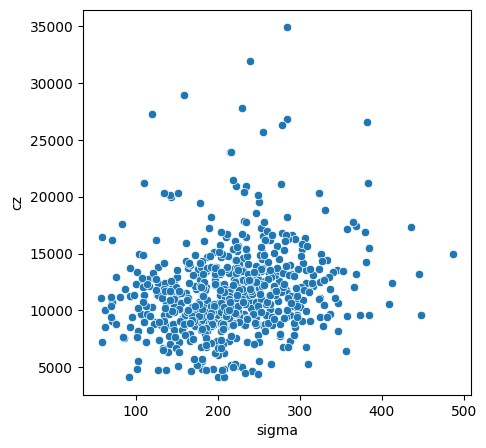

In [35]:
f6.funcion4(df)

<div style="color:red">(e)</div>
Graficar y realizar el ajuste cuando sea necesario

- $log(R_{e})$ vs $<SB_{e}>$ Distinguir tipos, tempranas y tardias
- $log(D_{n}/R_{e})$ vs $<SB_{e}>$ Para tipos tardios

In [36]:
# Estos son los tipos de galaxias:
df['Type'].unique()

# Tardias: ['S', 'SB0', 'SB']
# Tempranas: ['cD', 'E/S0', 'E']
# No tengo idea: ['tcD', 'DB']

array(['cD', 'E/S0', 'S', 'E', 'SB0', 'SB', 'DB'], dtype=object)

In [37]:
df_s = df[df['Type'].isin(['S', 'SB0', 'SB'])]
df_e = df[df['Type'].isin(['cD', 'E/S0', 'E'])]


array([<Axes: xlabel='$log(R_{e})$', ylabel='$<SB_{e}>$'>,
       <Axes: xlabel='$log(R_{e})$', ylabel='$<SB_{e}>$'>], dtype=object)

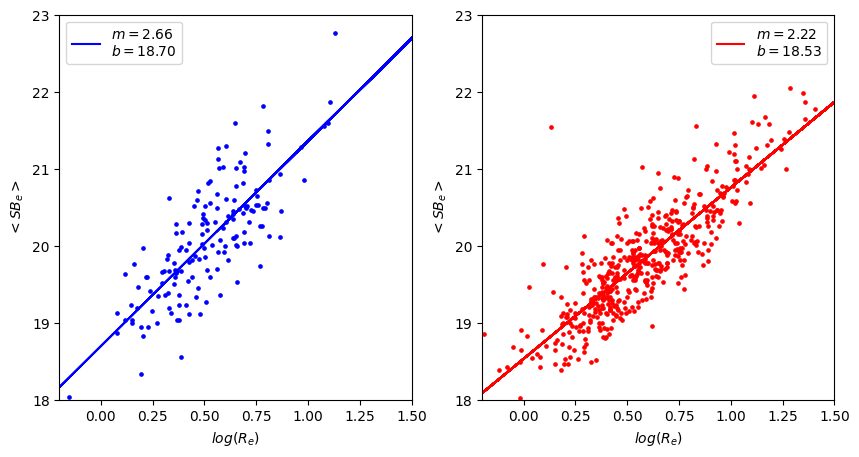

In [38]:
f6.funcion6(df_e,df_s)

<Axes: xlabel='$log(D_{n}/R_{e})$', ylabel='$<SB_{e}>$'>

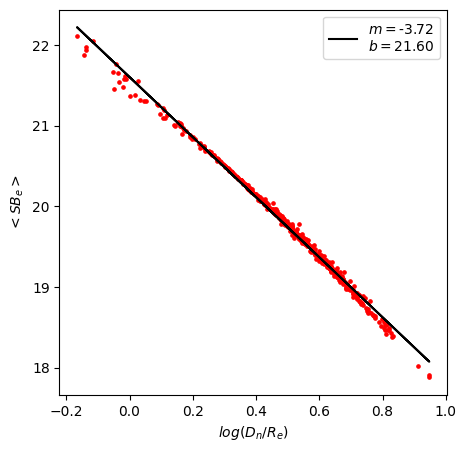

In [39]:
f6.funcion7(df_e)

5) Graficar para tipos tempranos y realizar un ajuste lineal cuando sea posible:
    - $log(\sigma)$ vs $log(R_{e})$
    - $log(\sigma)$ vs $<SB_{e}>$
    - $M_{r}$ vs $log(\sigma)$
    - $M_{r}$ vs $log(R_{e} \sigma)$

In [40]:
dfe = df_e[(df_e['log_sigma']<2.7)&(df_e['log_sigma']>2.0)]
dfe.reset_index(inplace=True)


array([[<Axes: xlabel='$log(\\sigma)$', ylabel='$log(R_{e})$'>,
        <Axes: xlabel='$log(\\sigma)$', ylabel='$<SB_{e}>$'>],
       [<Axes: xlabel='$M_{r}$', ylabel='$log(\\sigma)$'>,
        <Axes: xlabel='$M_{r}$', ylabel='$log(R_{e}\\sigma^{2})$'>]],
      dtype=object)

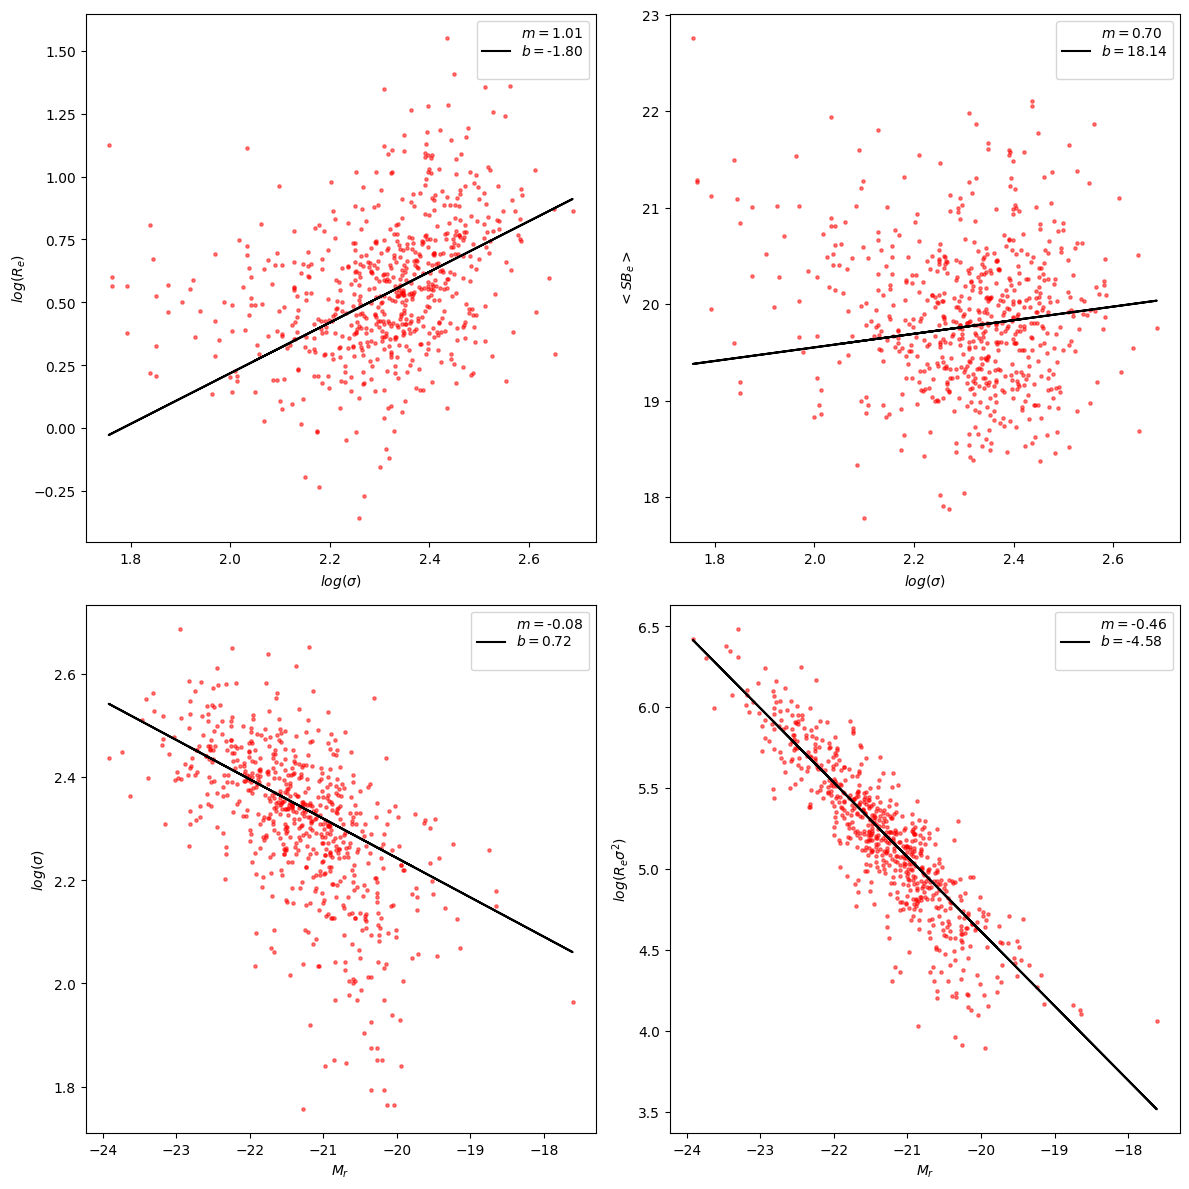

In [41]:
f6.funcion8(df,dfe)

6) Graficar el plano fundamental en 3D: (log(Re), log(σ), log < SBe >)

<Axes3D: xlabel='log_re', ylabel='log_sigma', zlabel='log(SBe)'>

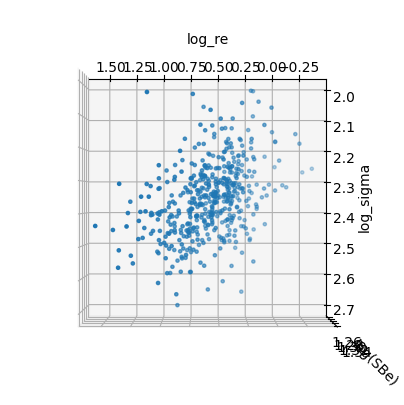

In [49]:

f6.funcion9(dfe,elev=90,azim=90,roll=0)


<Axes3D: xlabel='log_re', ylabel='log_sigma', zlabel='log(SBe)'>

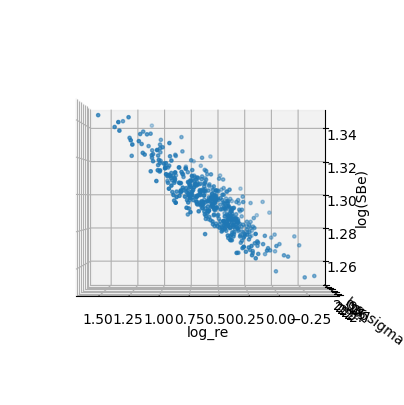

In [47]:
f6.funcion9(dfe,elev=0,azim=90,roll=0)

<Axes3D: xlabel='log_re', ylabel='log_sigma', zlabel='log(SBe)'>

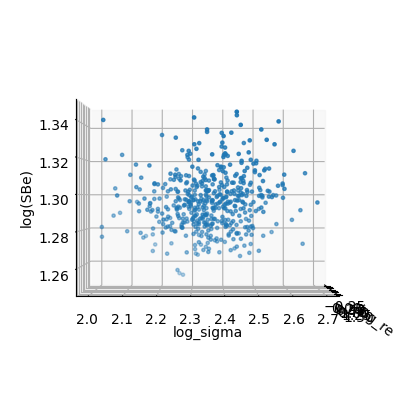

In [50]:
f6.funcion9(dfe,elev=0,azim=0,roll=0)

# Fitting plano fundamental

- La ecuacion escalar de un plano es la siguiente:
$$a(x-x_{0})+b(y-y_{0})+c(z-z_{0})=0$$

- Donde el vector normal al mismo esta dado por: $n=(a,b,c)$

- Reordenando la ecuacion, la expresamos en la forma mas comun para uso con algoritmos:
$$ax+by+cz-[ax_{0}+by_{0}+cz_{0}]$$
$$z=f(x,y)=\frac{[ax_{0}+by_{0}+cz_{0}]}{c}-\frac{a}{c}x -\frac{b}{c}y$$

- La funcion que voy a programar para hacer este fitting seria la siguiente:
$$f(x,y,z,a,b,c)=\frac{[ax_{0}+by_{0}+cz_{0}]}{c}-\frac{a}{c}x -\frac{b}{c}y$$

In [43]:
def ffit(xy,a,b,c):
    indx = 0
    x0=np.array(dfe['log_re'])[indx]
    y0=np.array(dfe['log_sigma'])[indx]
    z0=np.log10(dfe['<SBe>'])[indx]
    x,y=xy
    d = a*x0+b*y0+c*z0
    return (d-a*x-b*y)/c

In [44]:
popt, pcov = curve_fit(ffit, (dfe['log_re'], dfe['log_sigma']), np.log10(dfe['<SBe>']))

In [45]:
# Vector normal

indx = 0
x0=np.array(dfe['log_re'])[indx]
y0=np.array(dfe['log_sigma'])[indx]
z0=np.log10(dfe['<SBe>'])[indx]
# (x0,y0,z0)
popt

array([-0.21542737,  0.16808469,  4.17275954])

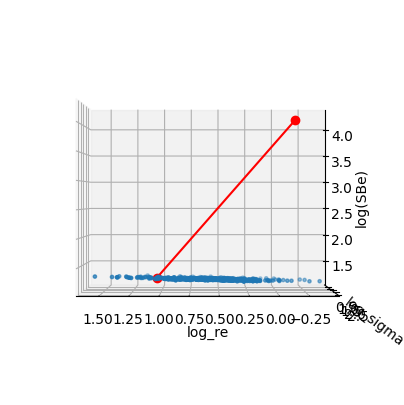

In [46]:
fig = plt.figure(figsize=(5,5))
ax = plt.axes(projection ='3d')
ax.scatter3D(dfe['log_re'],dfe['log_sigma'],np.log10(dfe['<SBe>']),s=5.5)
ax.view_init(elev=0, azim=90, roll=0) #0,90 log_re log_sbe ; 90,90 log_re log_sigma
ax.set_xlabel('log_re')
ax.set_ylabel('log_sigma')
ax.set_zlabel('log(SBe)')
ax.plot((x0,popt[0]),(y0,popt[1]),(z0,popt[2]),c='red',marker='o')

No pude ajustar de forma correcta el plano fundamental.

# Quiz de Preguntas 

- Las galaxias espirales tienen estrellas de Población I
    - Poblacion I: Corresponde a estrellas jovenes, azules y ricas en metales.Ubicadas principalmente en los brazos de las galaxias espirales.
    - Poblacion II: Son estrellas Rojas viejas, y pobres en metales. Se encuentran en el bulbo de las galaxias.
    - Respuesta: Verdadero

- La clasificación morfológica de Hubble da información de la verdadera forma de las galaxias.

    - La clasificacion de Hubble revela morfologia de una galaxia en el espectro optico visible. Sin embargo las galaxias poseen otras caracteristicas visibles en otras longitudes de onda.
    - Proyectos como Galaxy Zoo, clasifican las galaxias en el optico principalmente en galaxias S y E. Pero ya en el practico 2 habiamos visto otras formas de clasificar las galaxias como el indice de concentracion C, magnitud u-r, frac deV.
    - Separar las galaxias en el optico o utilizando alguno de las otras propiedades no siempre arroja el mismo resultado.
    - Respuesta: Falso, el sistema de Hubble da informacion de como son las galaxias en el optico, aunque a veces encuentra limitaciones debidas a que tan difusa es la imagen. Hay otros metodos para clasificar galaxias.

- Las galaxias elípticas tienen masas del orden de:
    - Masas E: $(10^{7} - 10^{13})M_{sun}$ otra Fuente: $(10^{5}-10^{13})M_{sun}$
    - Masas S:$(10^{9} - 10^{12})M_{sun}$ otra Fuente: $(10^{9}-4 \times 10^{11})M_{sun}$
    - Respuesta: 10^5 a 10^11

- El indice de concentración C separa a las galaxias en:
    - Respuesta: Tempranas y Tardias

- El diagrama color-magnitud distingue poblaciones de galaxias:
    - Rojas y azules (Secuencia Roja y Nube azul)

- La clasificación espectral de las galaxias nos da información en lo que respecta a la población estelar de sus subsistemas. Un espectro integrado de toda una galaxia resulta de la composición individual de sus estrellas y de la absorción del medio interestelar.
    - Respuesta: Verdadero

- Los discos y los bulbos se diferencian por su contenido en metales. Los discos contribuyen con supernovas tipo I, las cuales se hallan asociadas a estrellas jóvenes y masivas, las cuales enriquecen al medio intergaláctico.
    - Las supernovas de tipo I tienen una subclasificacion en tres tipos de supernova:
    - Tipo Ia: Debidas a implosion de estrellas enanas blancas cuando estas sobrepasan el limite de masa de Chandrasekar. Este tipo de Supernovas puede darse en cualquier tipo de galaxia ya que su progenitora es una estrella vieja.
    - Tipo Ib,c (Y tambien Supernovas de tipo II): Ocurren en galaxias espirales e irregulares donde predominan las estrellas azules y vinculadas a una poblacion estelar joven. Estas supernovas son la etapa final de las estrellas mas jovenes y masivas.
    - Respuesta: Falso, aca voy a asumir que la pregunta se refiere a la supernova de tipo Ia, la cual es la mas caracteristica y que se utiliza como *standard candle*

- La corrección K es mayor en galaxias elípticas y mayor en los filtros del infrarrojo.
    - La correccion K es mayor entre mas alejada este la galaxia del rest-frame en terminos de redshift.
    - Respuesta: Falso

- La tasa de formación estelar especifica permite separar a las galaxias en:
    - La sSFR es el cociente entre la SFR y masa de la galaxia. Las galaxias formadoras de estrellas son menos masivas las cuales son las espirales o irregulares. Las galaxias con menor sSFR son las elipticas, que son las mas masivas y con baja SFR.
    - Respuesta: las dos primeras opciones son correctas

- En el diagrama de la tasa de formación vs la masa estelar, la mayoría de la masa está en la secuencia principal.
    - No supe muy bien como responder esta pregunta. Creo que esto podria ser referente a que el diagrama nos daria informacion acerca de historia evolutiva de la poblacion de estrellas de las galaxias lo cual estaria relacionado a la secuencia principal.

- El quiebre a 4000 Å se debe a la superposición de muchas líneas de absorción metálicas, originadas en las atmósferas de estrellas frías. Por eso, el quiebre a 4000 Å es muy intenso en galaxias de tipo tardío y débil o inexistente en galaxias de tipo temprano.
    - Respuesta: Verdadero

- No solo se ve una variación en los colores con el tipo de Hubble, sino que cada galaxia presenta un gradiente de colores, siendo los bulbos generalmente más rojos que los discos. Esto se debe a:
    - Las regiones starforming estan asociadas a estrellas jovenes y muy calientes: OB estas tienen un tono azulado.
    - Por otro lado, en cuanto a la metalicidad, se sabe que las estrellas mas viejas tienen elementos mas pesados que el Hidrogeno. Las galaxias elipticas son rojas y con abundancia de estos elementos pesados en su poblacion estelar.
    - Respuesta: Metalicidad y SF

- La metalicidad es un trazador de la fracción de masa bariónica que se ha convertido en estrellas, además de ser sensible a la pérdida de metales debido a vientos galácticos, supernovas y retroalimentación debida a núcleos activos.
    - Esta me cuesta un poco mas: Se que fenomenos como los vientos galacticos y supernovas llenan de metales el medio interestelar
    - Diria que es verdadero

- La masa estelar y la metalicidad están fuertemente relacionadas en galaxias con formación estelar, donde las galaxias máss masivas:
    - En el grafico de Tremonti 2004 se ve que a mayor masa mayor metalicidad (en fase gaseosa)
    - Respuesta: muestran metalicidades mayores que galaxias menos masivas.

